In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Klasifikasi

Dataset: https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset

In [ ]:
data = pd.read_csv('https://github.com/fahmimnalfrzki/Dataset/blob/main/smoke_detection_iot.csv?raw=true')
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [ ]:
data.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


Terdapat anomali pada kolom PM1.0, PM2.5, NC0.5, NC1.0, NC2.5 karena nilai maksimumnya jauh lebih besar dari Q3 nya

In [ ]:
data = data.drop(columns='Unnamed: 0')

In [ ]:
data.rename({'Temperature[C]':'temp',
             'Humidity[%]':'hum',
             'TVOC[ppb]':'tvoc',
             'eCO2[ppm]':'eco2',
             'Raw H2':'h2',
             'Raw Ethanol':'etha',
             'Pressure[hPa]':'P'},axis=1,inplace=True)

data.head()

,UTC,temp,hum,tvoc,eco2,h2,etha,P,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


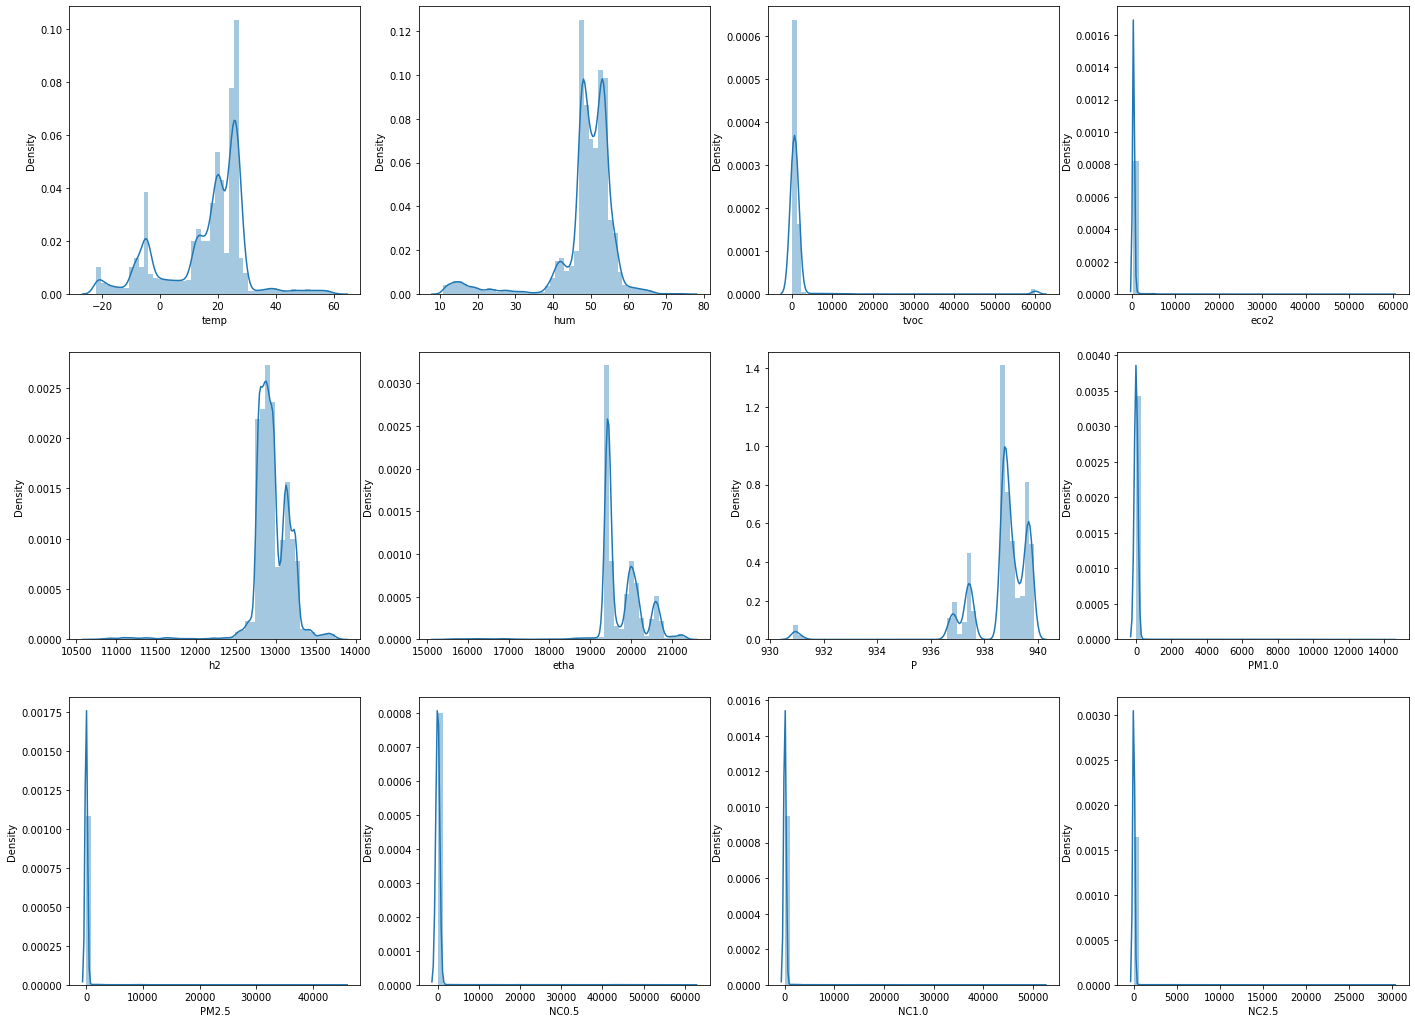

In [ ]:
import warnings
warnings.filterwarnings("ignore")

cols_dis = ['temp','hum','tvoc','eco2','h2','etha','P','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5','CNT']
fig, ax = plt.subplots(ncols=4,nrows=3,figsize=(24,18))
x=0
for i in range(3):
  for j in range(4):
    try:
      sns.distplot(data[cols_dis[x]],ax=ax[i][j])
      x+=1
    except:
      pass
plt.show()

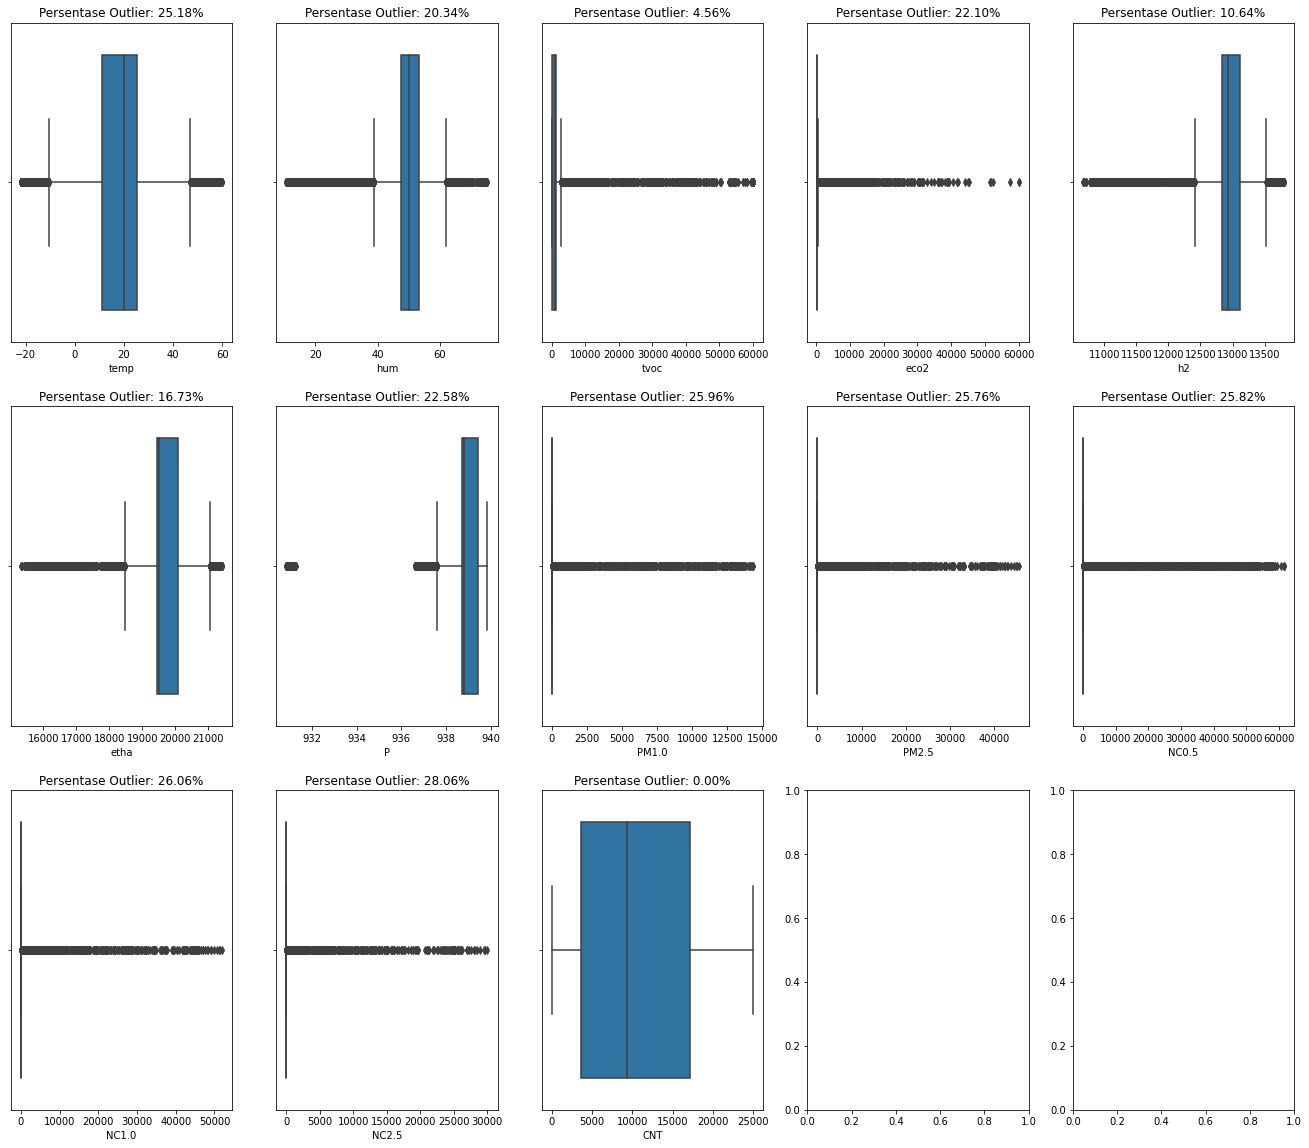

In [ ]:
warnings.filterwarnings("ignore")

def outlier_analysis(data,col):
  skewness = data[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = data[col].mean() + 3*data[col].std()
    lower = data[col].mean() - 3*data[col].std()
  else:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + 1.5*IQR
    lower = Q3 - 1.5*IQR
  
  no_outliers = data[(data[col]>=lower) & (data[col]<=upper)]
  outliers = data[(data[col]<lower) | (data[col]>upper)]

  return outliers,no_outliers, upper, lower

cols_dis = ['temp','hum','tvoc','eco2','h2','etha','P','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5','CNT']
fig, ax = plt.subplots(ncols=5,nrows=3,figsize=(23,20))
x=0
for i in range(3):
  for j in range(5):
    try:
      out,no_out, up, low = outlier_analysis(data,cols_dis[x])
      sns.boxplot(data[cols_dis[x]],ax=ax[i][j])
      ax[i][j].set_title('Persentase Outlier: {:.2f}%'.format(len(out)*100/len(data)))
      x+=1
    except:
      pass
plt.show()

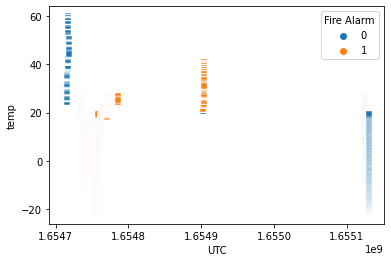

In [ ]:
sns.scatterplot(data['UTC'],data['temp'],hue=data['Fire Alarm'],marker='s')

In [ ]:
from scipy.stats import ttest_ind
cols = ['UTC','temp','hum','tvoc','eco2','h2','etha','P','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5','CNT']
for x in cols:
  out,no_out, up, low = outlier_analysis(data,x)

  x_0 = no_out[x][no_out['Fire Alarm']==0]
  x_1 = no_out[x][no_out['Fire Alarm']==1]

  t, p = ttest_ind(x_0,x_1)

  if p<0.05:
    print(f'{x} berelasi dengan target dengan p-val = {p}')
  else:
    print(f'{x} tidak berelasi dengan target dengan p-val = {p}')

UTC berelasi dengan target dengan p-val = 0.0
temp tidak berelasi dengan target dengan p-val = 0.2848865658302955
hum berelasi dengan target dengan p-val = 0.0
tvoc berelasi dengan target dengan p-val = 0.0
eco2 berelasi dengan target dengan p-val = 2.12398700034449e-14
h2 berelasi dengan target dengan p-val = 4.697688801148632e-80
etha berelasi dengan target dengan p-val = 0.0
P berelasi dengan target dengan p-val = 0.0
PM1.0 berelasi dengan target dengan p-val = 0.0
PM2.5 berelasi dengan target dengan p-val = 0.0
NC0.5 berelasi dengan target dengan p-val = 0.0
NC1.0 berelasi dengan target dengan p-val = 0.0
NC2.5 berelasi dengan target dengan p-val = 3.094900912050246e-213
CNT berelasi dengan target dengan p-val = 0.0


kolom `temp` akan didrop karena tidak ada relasi dengan target

In [ ]:
new_data = data.drop(columns='temp')

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(new_data, train_size=0.8)

In [ ]:
new_train = train.copy()
cols = ['hum','tvoc','eco2','h2','etha','P','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5','CNT']
for col in cols:
  out,no_out, up, low = outlier_analysis(new_train,col)
  pct_out = len(out)*100/len(train)

  if pct_out<=15:
    new_train = new_train[(new_train[col]>=low) & (new_train[col]<=up)]
  else:
    new_train[col] = new_train[col].apply(lambda x: up if x>=up else low if x<=low else x)

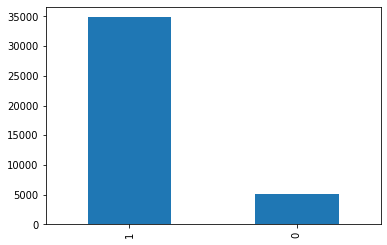

In [ ]:
new_train['Fire Alarm'].value_counts().plot(kind='bar')

In [ ]:
new_train = train.copy()
cols = ['hum','tvoc','eco2','h2','etha','P','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5','CNT']
for col in cols:
  out,no_out, up, low = outlier_analysis(new_train,col)
  new_train[col] = new_train[col].apply(lambda x: up if x>=up else low if x<=low else x)

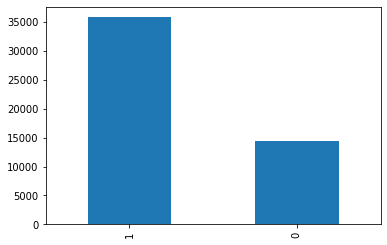

In [ ]:
new_train['Fire Alarm'].value_counts().plot(kind='bar')

In [ ]:
train_0 = new_train[train['Fire Alarm']==0]
train_1 = new_train[train['Fire Alarm']==1].sample(len(train_0))

new_train_sampling = pd.concat([train_0,train_1])
new_train_sampling = new_train_sampling.sample(len(new_train_sampling))

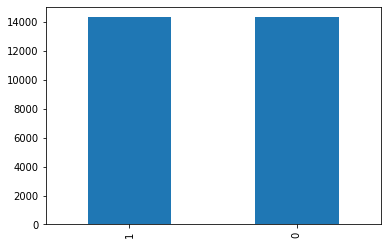

In [ ]:
new_train_sampling['Fire Alarm'].value_counts().plot(kind='bar')

In [ ]:
X_train = new_train_sampling.drop(columns='Fire Alarm')
y_train = new_train_sampling['Fire Alarm']

X_test = test.drop(columns='Fire Alarm')
y_test = test['Fire Alarm']

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
norm = 0
nonorm = 0
for col in X_train.columns:
  if X_train[col].skew() >=-0.5 and X_train[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from time import time

model = SVC(kernel='rbf', C=0.02, probability=True)

start = time()
model.fit(X_train_scaled,y_train)
end = time()

print(f"Durasi training: {end-start} detik")

Durasi training: 78.38760662078857 detik


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

y_train_prob = model.predict_proba(X_train_scaled)[:,1]
y_test_prob = model.predict_proba(X_test_scaled)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train,y_train_pred,zero_division=0))
print('AUC Score Train:',roc_auc_score(y_train,y_train_prob))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test,y_test_pred,zero_division=0))
print('AUC Score Test:',roc_auc_score(y_test,y_test_prob))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14333
           1       1.00      0.98      0.99     14333

    accuracy                           0.99     28666
   macro avg       0.99      0.99      0.99     28666
weighted avg       0.99      0.99      0.99     28666

AUC Score Train: 0.9984428180551161


========== TEST ==========
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      3540
           1       1.00      0.77      0.87      8986

    accuracy                           0.84     12526
   macro avg       0.82      0.89      0.82     12526
weighted avg       0.90      0.84      0.85     12526

AUC Score Test: 0.992133070149297


In [ ]:
model = SVC(kernel='poly', degree=4, C=0.02, probability=True)

start = time()
model.fit(X_train_scaled,y_train)
end = time()

print(f"Durasi training: {end-start} detik")

Durasi training: 58.8332622051239 detik


In [ ]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

y_train_prob = model.predict_proba(X_train_scaled)[:,1]
y_test_prob = model.predict_proba(X_test_scaled)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train,y_train_pred,zero_division=0))
print('AUC Score Train:',roc_auc_score(y_train,y_train_prob))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test,y_test_pred,zero_division=0))
print('AUC Score Test:',roc_auc_score(y_test,y_test_prob))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14333
           1       0.99      0.99      0.99     14333

    accuracy                           0.99     28666
   macro avg       0.99      0.99      0.99     28666
weighted avg       0.99      0.99      0.99     28666

AUC Score Train: 0.9985799125872918


========== TEST ==========
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3540
           1       0.99      0.99      0.99      8986

    accuracy                           0.98     12526
   macro avg       0.98      0.98      0.98     12526
weighted avg       0.98      0.98      0.98     12526

AUC Score Test: 0.9679873180000025


In [ ]:
model = SVC(kernel='linear', C=0.02, probability=True)

start = time()
model.fit(X_train_scaled,y_train)
end = time()

print(f"Durasi training: {end-start} detik")

Durasi training: 27.689790964126587 detik


In [ ]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

y_train_prob = model.predict_proba(X_train_scaled)[:,1]
y_test_prob = model.predict_proba(X_test_scaled)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train,y_train_pred,zero_division=0))
print('AUC Score Train:',roc_auc_score(y_train,y_train_prob))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test,y_test_pred,zero_division=0))
print('AUC Score Test:',roc_auc_score(y_test,y_test_prob))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     14333
           1       1.00      0.97      0.98     14333

    accuracy                           0.98     28666
   macro avg       0.98      0.98      0.98     28666
weighted avg       0.98      0.98      0.98     28666

AUC Score Train: 0.993964530533078


========== TEST ==========
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3540
           1       0.99      0.98      0.99      8986

    accuracy                           0.98     12526
   macro avg       0.98      0.98      0.98     12526
weighted avg       0.98      0.98      0.98     12526

AUC Score Test: 0.9868837086189314
